In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [10]:
# dataset = pd.read_csv('../dataframes/doc2vet_embedding.csv', header=None)
# dataset = pd.read_csv('../dataframes/infer_sent_embedding.csv', header=None)
# dataset = pd.read_csv('../dataframes/sentence_bert_embedding.csv', header=None)
dataset = pd.read_csv('../dataframes/universal_sentence_python.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-1.214745,-0.283617,-1.270768,1.537702,-0.459085,-0.993889,2.742131,1.059220,-1.893328,-1.928233,...,1.094292,-2.132212,0.469998,-0.944596,1.293732,-0.647479,0.219317,-1.710796,-0.109420,big_data
1,-0.239725,0.531531,2.088746,-0.950215,-0.696374,0.358628,-0.472627,0.071855,-2.446701,0.841731,...,0.208730,-2.264483,-0.659729,1.239643,-0.275169,-0.536493,-1.578909,-0.830742,-1.613818,5g
2,0.251089,1.065683,1.103420,-0.405558,0.289183,0.889629,-0.157562,0.810174,0.685724,-0.056801,...,-1.241523,0.386352,-0.323743,-0.911326,-1.623940,0.084220,0.276691,0.368230,1.331997,5g
3,-0.207214,-0.572141,-1.050872,-0.334811,-1.112067,-0.778233,1.201863,1.173641,-1.249250,0.795089,...,-0.514634,0.089595,1.131394,-1.147426,0.626237,0.194895,-0.360906,1.163492,-0.407590,cybersecurity
4,-0.009177,0.003597,-0.008110,0.000640,0.009924,-0.009576,0.006663,0.003818,0.003186,0.007003,...,0.004158,-0.008099,0.008873,0.004717,0.008786,0.000854,-0.009387,-0.005372,-0.002226,anxiety


In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = pd.factorize(y)[0]

In [15]:
import numpy as np

data, labels = X, y
labels_true = labels

(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
print(f"# labels: {n_digits}; # samples: {n_samples}; # features {n_features}")

X = StandardScaler().fit_transform(X)

# labels: 9; # samples: 58716; # features 50


In [23]:
db = DBSCAN(eps=0.01, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 0
Estimated number of noise points: 58716
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

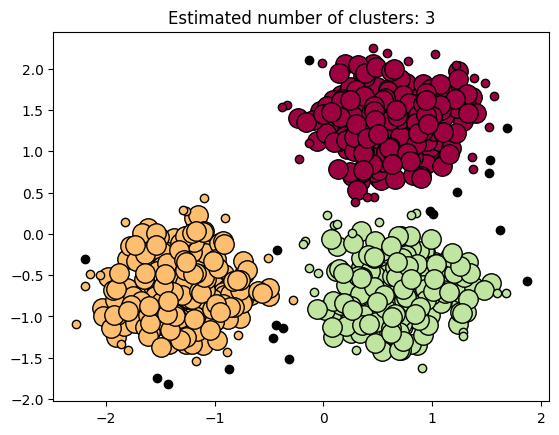

In [4]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-1.214745,-0.283617,-1.270768,1.537702,-0.459085,-0.993889,2.742131,1.059220,-1.893328,-1.928233,...,1.094292,-2.132212,0.469998,-0.944596,1.293732,-0.647479,0.219317,-1.710796,-0.109420,big_data
1,-0.239725,0.531531,2.088746,-0.950215,-0.696374,0.358628,-0.472627,0.071855,-2.446701,0.841731,...,0.208730,-2.264483,-0.659729,1.239643,-0.275169,-0.536493,-1.578909,-0.830742,-1.613818,5g
2,0.251089,1.065683,1.103420,-0.405558,0.289183,0.889629,-0.157562,0.810174,0.685724,-0.056801,...,-1.241523,0.386352,-0.323743,-0.911326,-1.623940,0.084220,0.276691,0.368230,1.331997,5g
3,-0.207214,-0.572141,-1.050872,-0.334811,-1.112067,-0.778233,1.201863,1.173641,-1.249250,0.795089,...,-0.514634,0.089595,1.131394,-1.147426,0.626237,0.194895,-0.360906,1.163492,-0.407590,cybersecurity
4,-0.009177,0.003597,-0.008110,0.000640,0.009924,-0.009576,0.006663,0.003818,0.003186,0.007003,...,0.004158,-0.008099,0.008873,0.004717,0.008786,0.000854,-0.009387,-0.005372,-0.002226,anxiety


In [18]:
import numpy as np

data, labels = X, y
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# labels: {n_digits}; # samples: {n_samples}; # features {n_features}")

# labels: 9; # samples: 58716; # features 50


In [19]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:10s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 	0.608s	2445002	0.401	0.361	0.380	0.287	0.380	0.027
random    	0.813s	2445019	0.398	0.359	0.377	0.284	0.377	0.041
PCA-based 	0.179s	2445020	0.398	0.359	0.377	0.284	0.377	0.030
__________________________________________________________________________________


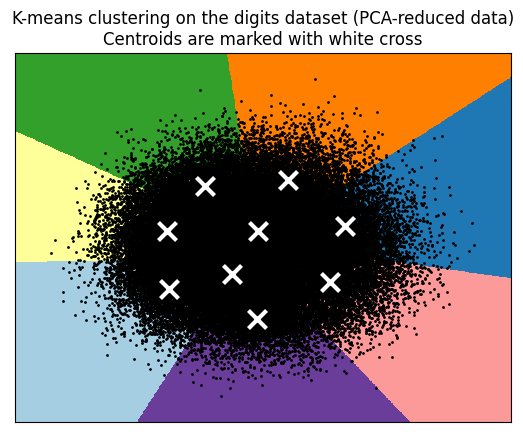

In [21]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()